## IMPORT LIBRARIES

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

### DATA IMPORTING AND EXPLORATION

In [2]:
dataframe=pd.read_csv("advertising.csv")

In [5]:
dataframe.shape

(200, 4)

In [6]:
dataframe.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
dataframe.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
dataframe.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

### DATA VISUALIZATION 

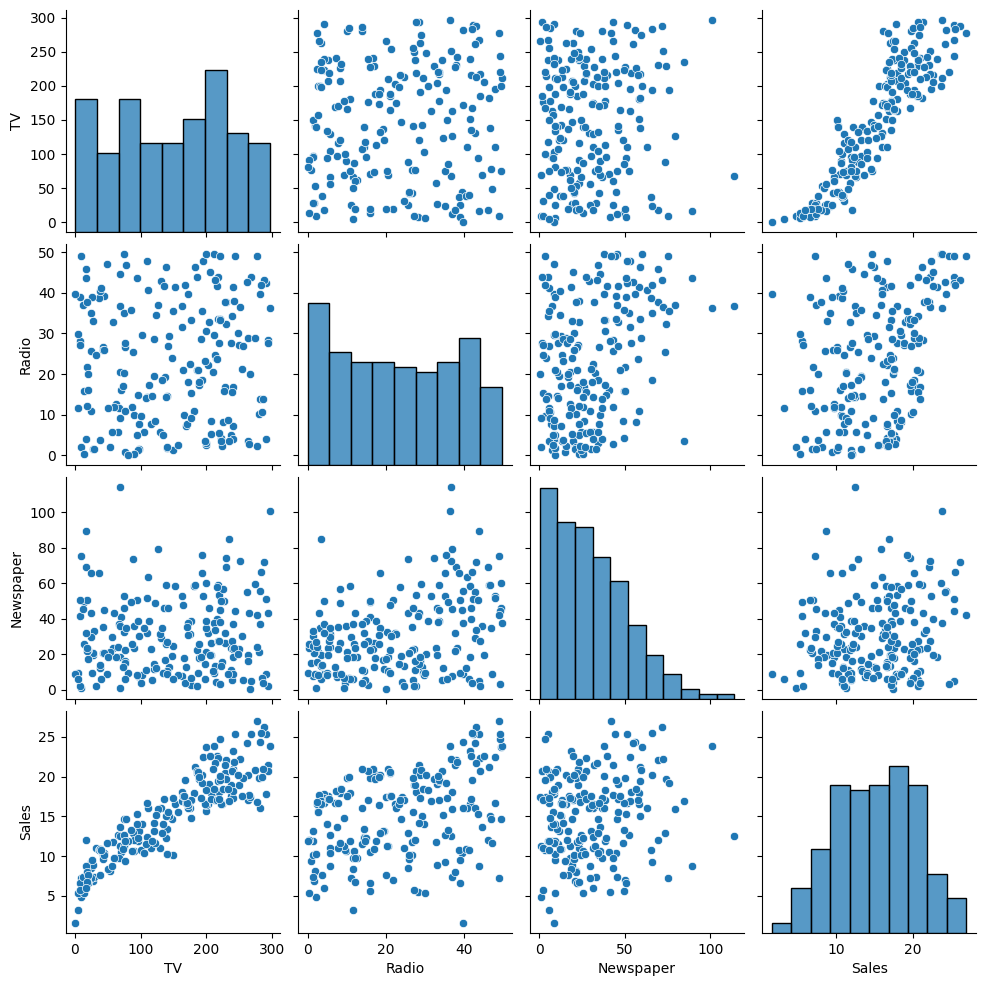

In [13]:
sns.pairplot(dataframe)
plt.show()

In [43]:
X=dataframe[["TV","Newspaper","Radio"]]  
Y=dataframe["Sales"]

In [45]:
X.shape

(200, 3)

In [23]:
Y.shape

(200,)

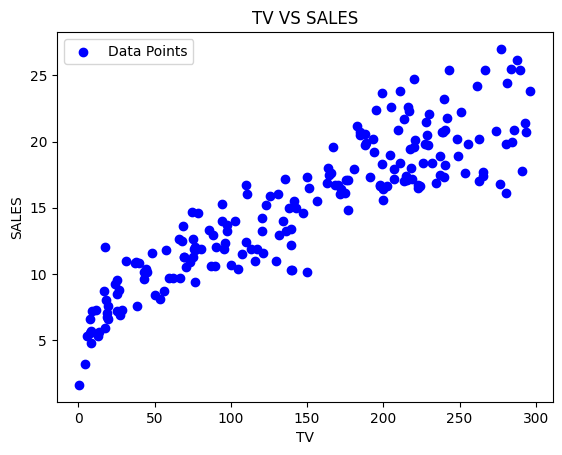

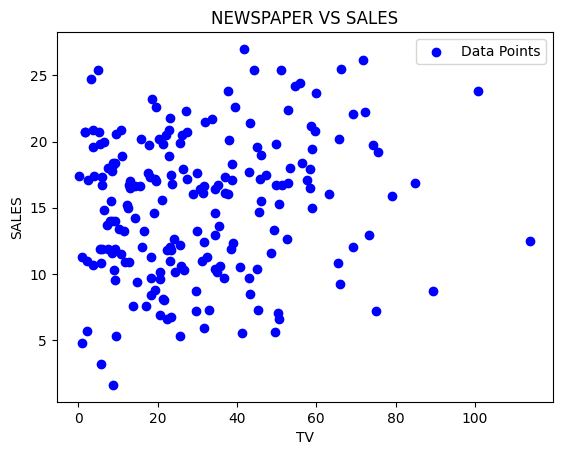

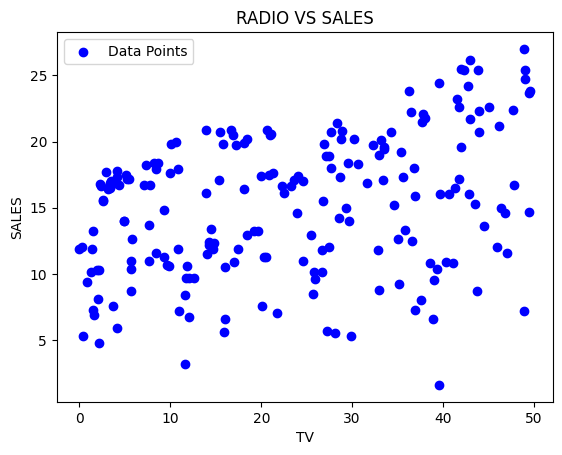

In [36]:
plt.scatter(dataframe["TV"],Y,label='Data Points', color='blue') 
plt.xlabel('TV')
plt.ylabel('SALES')
plt.title('TV VS SALES')
plt.legend()
plt.show() 
plt.scatter(dataframe["Newspaper"],Y,label='Data Points', color='blue') 
plt.xlabel('TV')
plt.ylabel('SALES')
plt.title('NEWSPAPER VS SALES')
plt.legend()
plt.show()
plt.scatter(dataframe["Radio"],Y,label='Data Points', color='blue') 
plt.xlabel('TV')
plt.ylabel('SALES')
plt.title('RADIO VS SALES')
plt.legend()
plt.show()

### DATA CLEANING && DATA MODELING

In [51]:
data_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [52]:
model = Pipeline(steps=[('preprocessor',data_transformer),
                        ('regressor', LinearRegression())])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('regressor', LinearRegression())])

In [60]:
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.9059011844150826
Mean Squared Error: 2.9077569102710923
Mean Absolute Error: 1.2748262109549344


In [62]:
y_test.shape

(40,)

In [69]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [67]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])